In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from PIL import Image
from IPython.display import display
import math
import numpy as np

## Concept 1: What is an image?
An image starts as a file saved on a disk in a computer. To read the image, you can use any programing language and leverage any image libraries. Here we use Python and Pillow (PIL for short), a Python library. After reading an image with PIL, you get a PIL image object which has many methods and properties you can query to understand and manipulate your image. For example, you can get the size of the image using the size function or you can display it using the display function.

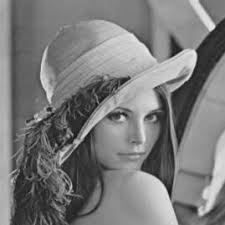

(225, 225)

In [4]:
path = "/workspace/Data/Lena.jpeg" 
img = Image.open(path)
width, height=img.size
display(img)
width, height

## Concept 2: Meet Lena
Lenna (or Lena) is a standard test image used in the field of digital image processing, starting in 1973. It is a picture of the Swedish model Lena Forsén, shot by photographer Dwight Hooker and cropped from the centerfold of the November 1972 issue of Playboy magazine.
[__Who is Lena__](https://www.google.com/search?sca_esv=deba1d0118d8a222&rlz=1C1OPNX_enUS1124US1125&sxsrf=ADLYWIL2jivlIjNjyZ3O5cXfPGZ6WJ9Udg:1732478856842&q=who+the+f+is+lena+in+image+processing&source=lnms&fbs=AEQNm0CI3085mQvq38n2Ub64z3TRfpRK3g8q4O-xBtJsSic-cIV0T0xPWbSDKEp9B2zrGNWZlPFymyY2rjkzrAQJd2A703KHNSyy6QLKURqYCesT-rHczw6201Gk6M_bTs8GMY8Qa-viHwRFEqk4GfHnKQz7mylPA2ZiXKNMJjYW1iXC3QWYci407hja7_CGkFWsJjzHRnin1gBNg4p7L_YRy2jH-UYSeQ&sa=X&ved=2ahUKEwiF7d7W4vWJAxUYEVkFHY7XLYoQ0pQJegQIExAB&biw=1536&bih=730&dpr=1.25)

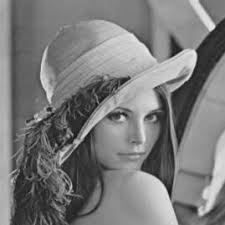

In [79]:
display(img)

## Concept 3: What actually is an image?
An image is an array of pixels, with each pixel being a tuple with three values corresponding to its respective R, G, and B color intensities, each typically ranging from 0-255. To find a certain pixel in an image using the PIL library, you give two indices (which correspond to rows and columns) to a function, just like any other image library. 

In [80]:
p = img.getpixel((50, 100))
red_intensity = p[0]
green_intensity = p[1]
blue_intensity = p[2]
red_intensity,green_intensity,blue_intensity

(188, 188, 188)

## Concept 4: The most basic coding pattern for image processing

In [81]:
def DuplicateImg(img):
    width, height=img.size
    newimg = Image.new("RGB", (width, height), "white")
    for x in range(0, width):
        for y in range(0, height):
            p = img.getpixel((x, y))
            newimg.putpixel((x,y),p)
    return newimg

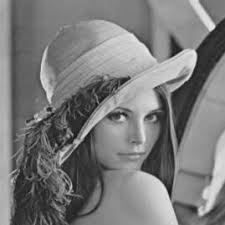

In [82]:
DuplicateImg(img)

## Concept 5: Real example of image processing
Threshold is one of the simplest example of image processing

In [85]:
def Threshold(img, threshold):
    width, height=img.size
    newimg = Image.new("RGB", (width, height), "white")
    
    for x in range(0, width):
        for y in range(0, height):
            p = img.getpixel((x-1, y-1))
            r = p[0]
            g = p[1]
            b = p[2]
            if ((r + g + b)/3)>=threshold:
                newimg.putpixel((x,y),(255,255,255))
            else:
                newimg.putpixel((x,y),(0,0,0))
    return(newimg)

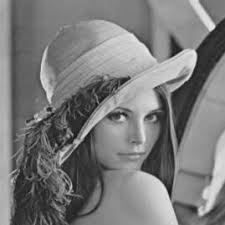

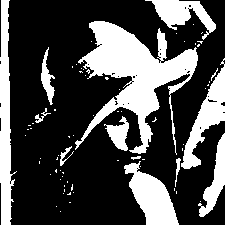

In [89]:
display(img)
Threshold(img, 150)

## Concept 6: In this tutorial, we will focus on kernel convolution which is a more advanced and powerful type of image processing technique  
kernel convolution involves an N by N matrix (which is called a kernel), with a matching N by N sliding window in the image.

In [48]:
def Normalize(nparray: np.ndarray, maxv: float=255):
    # width=len(nparray[0])
    # height=len(nparray)
    nparray0 = nparray.astype(np.float64)
    width= nparray0.shape[0]
    height= nparray0.shape[1] 
    min_intensity = nparray.min()
    max_intensity = nparray.max()
    print(width,height)
    print(min_intensity,max_intensity)
    newnparray = maxv* (nparray0 - min_intensity)/(max_intensity - min_intensity)
    return newnparray

In [44]:
kernel=[[0,-1,0],[0,0,0],[0,1,0]]

def ConvolveImgKer(img, kernel):
    width, height=img.size
    # newimgnparray=[[[0.]*3]*(width-2)]*(height-2)    # [[[0]*(width-2)]*(height-2)]*3
    newimgnparray = np.zeros(((height-2), (width-2), 3)).astype(np.float64)
    float_kernel = [[float(x) for x in sublist] for sublist in kernel]
    
    newimg = Image.new("RGB", (width-2, height-2), "white")
    # print(newimg)
    # smallest_number_in_kernel=min(min(sublist) for sublist in kernel)
    # print(smallest_number_in_kernel)
    # print(1-smallest_number_in_kernel)
    # kernel_sum=0
    # for x in range(0, len(kernel)):
    #     for y in range(0, len(kernel[0])):
    #         kernel[x][y]=kernel[x][y]-smallest_number_in_kernel
    #         print(kernel[x][y])
    #         kernel_sum=kernel_sum+kernel[x][y]
    # # print(kernel_sum)
    # for x in range(0, len(kernel)):
    #     for y in range(0, len(kernel)):
    #         kernel[x][y]=kernel[x][y]/kernel_sum
    # print(kernel) 
    for row_counter in range(1, width-1):
        for column_counter in range(1, height-1): # ignore edge pixels for simplicity (1 to height-1)
            Gp=0
            p = img.getpixel((column_counter-1, row_counter-1))
            Gp += (float(p[0] + p[1] + p[2])/3)*float_kernel[0][0]
    
            p = img.getpixel((column_counter, row_counter-1))
            Gp += (float(p[0] + p[1] + p[2])/3)*float_kernel[0][1]
    
            p = img.getpixel((column_counter+1, row_counter-1))
            Gp += float((p[0] + p[1] + p[2])/3)*float_kernel[0][2]
    
            p = img.getpixel((column_counter-1, row_counter))
            Gp += (float(p[0] + p[1] + p[2])/3)*float_kernel[1][0]
                  
            p = img.getpixel((column_counter, row_counter))
            Gp += (float(p[0] + p[1] + p[2])/3)*float_kernel[1][1]
    
            p = img.getpixel((column_counter+1, row_counter))
            Gp += (float(p[0] + p[1] + p[2])/3)*float_kernel[1][2]
    
            p = img.getpixel((column_counter-1, row_counter+1))
            Gp += (float(p[0] + p[1] + p[2])/3)*float_kernel[2][0]
    
            p = img.getpixel((column_counter, row_counter+1))
            Gp += (float(p[0] + p[1] + p[2])/3)*float_kernel[2][1]

            p = img.getpixel((column_counter+1, row_counter+1))
            Gp += (float(p[0] + p[1] + p[2])/3)*float_kernel[2][2]

            
            newimgnparray[row_counter-1][column_counter-1][0]=Gp
            newimgnparray[row_counter-1][column_counter-1][1]=Gp
            newimgnparray[row_counter-1][column_counter-1][2]=Gp
            Gp=int(Gp)
            newimg.putpixel((column_counter-1,row_counter-1),(Gp,Gp,Gp))

    # p = img.getpixel((7, 2))
    # print(p, float_kernel[0][1], float_kernel[2][1], (float(p[0] + p[1] + p[2])/3)*float_kernel[0][1])
    # print(p, float_kernel[0][1], float_kernel[2][1], (float(p[0] + p[1] + p[2])/3)*float_kernel[2][2])

    
    # print(np.array(img)[6:8][0:2])
    # print(newimg[6:8][0:2])
    # normy = Normalize(np.array(newimg)).astype(np.uint8)
    # return(Image.fromarray(np.array(newimgnparray )))
    return newimgnparray, newimg

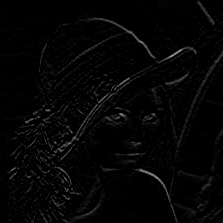

223 223
-157.0 164.0


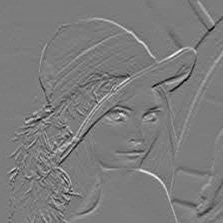

In [49]:
convy, convyimg=ConvolveImgKer(img, kernel)
display(convyimg)

display(Image.fromarray(Normalize(convy).astype(np.uint8)))


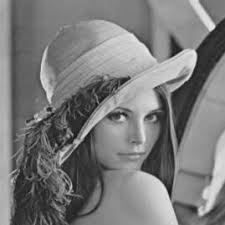

array([[[189, 189, 189]],

       [[183, 183, 183]]], dtype=uint8)

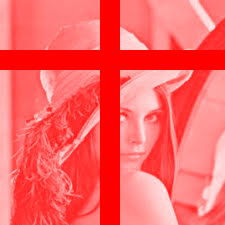

In [37]:
display(img)
arry = np.array(img)
arry[50:52,100:101]
arry[50:70]=0
arry[:,100:120]=0
arry[:,:,0]=255
display(Image.fromarray(arry))

In [26]:
len(convy)
len(convy[0])
len(convy[0][0])
convy[99:101][99:101]
convyimg.getpixel((99, 99))
convyimg.getpixel((99, 100))
convyimg.getpixel((99, 101))
convyimg.getpixel((100, 99))
convyimg.getpixel((100, 100))
convyimg.getpixel((100, 101))
convyimg.getpixel((101, 99))
convyimg.getpixel((101, 100))
convyimg.getpixel((101, 101))

223

223

3

[]

(0, 0, 0)

(19, 19, 19)

(88, 88, 88)

(23, 23, 23)

(79, 79, 79)

(74, 74, 74)

(66, 66, 66)

(83, 83, 83)

(27, 27, 27)

In [12]:
convy=ConvolveImgKer(img, kernel)
display(convy)
# normy = Normalize(np.array(convy)).astype(np.uint8)
# Image.fromarray(normy )

TypeError: Cannot handle this data type: (1, 1, 3), <i8

225 225
uint8
(225, 225, 3)
151875
[[184 184 184]
 [181 181 181]
 [177 177 177]
 [178 178 178]
 [180 180 180]
 [176 176 176]
 [168 168 168]
 [160 160 160]
 [147 147 147]
 [137 137 137]]


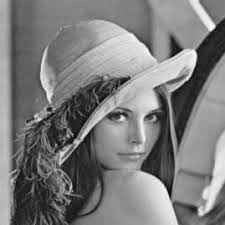

In [216]:
normy = Normalize(np.array(img)).astype(np.uint8)
Image.fromarray(normy )